In [1]:
import pandas as pd

In [2]:
data = pd.read_excel("drive/My Drive/malicious url/data_new.xlsx")

In [3]:
data

,url,label
0,diaryofagameaddict.com,bad
1,espdesign.com.au,bad
2,iamagameaddict.com,bad
3,kalantzis.net,bad
4,slightlyoffcenter.net,bad
...,...,...
225008,elyrics.net/read/d/donovan-lyrics/three-king-f...,good
225009,elyrics.net/read/d/downthesun-lyrics/lucas-too...,good
225010,elyrics.net/read/d/drowning-pool-lyrics/break-...,good
225011,elyrics.net/read/e/echo-hollow-lyrics/through-...,good


In [7]:
data.isna().sum()

url      1
label    1
dtype: int64

In [8]:
data.dropna(subset=['url'], how='all', inplace=True)

In [9]:
data.dropna(subset=['label'], how='all', inplace=True)

In [10]:
data.isna().sum()

url      0
label    0
dtype: int64

In [11]:
data.shape

(225011, 2)

In [12]:
import plotly.express as px

fig = px.pie(data['label'], values=data['label'].value_counts().values, names=data['label'].value_counts().index)
fig.update_traces(hoverinfo='label+percent', textinfo='value')
fig.show()

## Default Tokenizer

In [13]:
import numpy as np 
import random

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [15]:
label = data['label']

In [14]:
feature = data['url']

In [16]:
deafult_vectorizer = TfidfVectorizer()

In [17]:
X = deafult_vectorizer.fit_transform(feature)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, label, test_size=0.3, shuffle=True, random_state=1)

In [19]:
model = LogisticRegression()
model.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [20]:
# Accuracy
print("Accuracy ", model.score(X_test, y_test))

Accuracy  0.9675722920123252


In [22]:
predicted = model.predict(X_test)

In [26]:
predicted

array(['good', 'good', 'good', ..., 'good', 'good', 'good'], dtype=object)

In [29]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, plot_confusion_matrix
import matplotlib.pyplot as plt

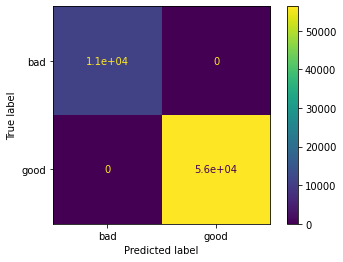

In [30]:
plot_confusion_matrix(model, X_test, predicted)

In [32]:
import pickle
# save the model to disk
filename = "drive/My Drive/malicious url/default_model.pkl"
pickle.dump(model, open(filename, 'wb'))

## using custom tokenizer

In [33]:
our_feature = data['url']
our_label = data['label']

In [36]:
def makeTokens(f):
    tkns_BySlash = str(f.encode('utf-8')).split('/')	# make tokens after splitting by slash
    total_Tokens = []
    for i in tkns_BySlash:
      tokens = str(i).split('-')	# make tokens after splitting by dash
      tkns_ByDot = []
      for j in range(0,len(tokens)):
        temp_Tokens = str(tokens[j]).split('.')	# make tokens after splitting by dot
        tkns_ByDot = tkns_ByDot + temp_Tokens
      total_Tokens = total_Tokens + tokens + tkns_ByDot
    total_Tokens = list(set(total_Tokens))	#remove redundant tokens
    if 'com' in total_Tokens:
      total_Tokens.remove('com')	#removing .com since it occurs a lot of times and it should not be included in our features
    elif 'net' in total_Tokens:
      total_Tokens.remove('net')  #removing .net since it occurs a lot of times and it should not be included in our features
    return total_Tokens

In [37]:
custom_vectorizer = TfidfVectorizer(tokenizer=makeTokens)

In [38]:
custom_X = custom_vectorizer.fit_transform(our_feature)

In [39]:
custom_X_train, custom_X_test, custom_y_train, custom_y_test = train_test_split(custom_X, our_label, test_size=0.3, shuffle=True, random_state=42)

In [40]:
custom_model = LogisticRegression()
custom_model.fit(custom_X_train, custom_y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [41]:
# Accuracy of Our Model
print("Accuracy ", custom_model.score(custom_X_test, custom_y_test))

Accuracy  0.961187485186063


In [42]:
custom_predicted = custom_model.predict(custom_X_test)
custom_predicted

array(['good', 'good', 'good', ..., 'good', 'good', 'good'], dtype=object)

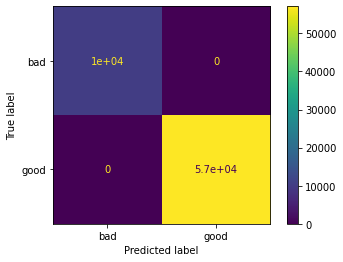

In [43]:
plot_confusion_matrix(custom_model, custom_X_test, custom_predicted)